# PDAN8411 POE Part 1
## Preparation
In order to evaluate the dataset, and perform analysis on it, i need to first prepare my environment (set up Kaggle, download the dataset, and import the required packages)

In [217]:
# first off, i make sure that kaggle is correctly installed in my python environment. by using the kaggle package directly, i can download datasets right here inside my notebook
# this saves me from manually having to download the dataset from the website and extract it
%pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [218]:
# now that i know that kaggle is installed, i can pull down the required dataset, and extract it (using tar, as it is platform independent)
!kaggle datasets download mirichoi0218/insurance
!tar xvf insurance.zip 

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
insurance.zip: Skipping, found more recently modified local copy (use --force to force download)


x insurance.csv


In [219]:
# lastly, i import the packages that i'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Question 1: Evaluate the Dataset

In [220]:
# first, i need to load the dataset into a dataframe
insurance_df = pd.read_csv('insurance.csv')

# then, i check the shape to see what it actually consists of
insurance_df.shape

# based on that, i can see that there are 1338 rows and 7 columns, i then do .head to see the first 5 rows so that i can see what the data looks like
insurance_df.head()
# 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [221]:
# now that i know what i'm dealing with, i need to check if the dataset is clean to work with (i.e., no missing values, etc.)
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [222]:
# so, no nulls means that the dataset has no missing values. this is a good sign.
# next up, i need to check if the dataset is clean to work with (i.e., no duplicates, etc.)
insurance_df.duplicated().sum()

1

In [223]:
# based on the output, i can see that there is a duplicate row
# usually, this is a sign that the dataset is not clean to work with, but since this is a small dataset, i can just drop the duplicate row
insurance_df = insurance_df.drop_duplicates()

In [224]:
# next up i should encode the categorical variables
# i'll use label encoding for this
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
insurance_df['sex'] = le.fit_transform(insurance_df['sex'])
insurance_df['smoker'] = le.fit_transform(insurance_df['smoker'])
insurance_df['region'] = le.fit_transform(insurance_df['region'])

# this will replace the categorical (text) values with numerical values (which we can use mathematically)
# 'sex' will now have a value of 0 or 1, as opposed to 'female' or 'male'
# 'smoker' will now have a value of 0 or 1, as opposed to 'yes' or 'no'
# 'region' will now have a value of 0, 1, 2, or 3, as opposed to 'southwest', 'southeast', 'northwest', or 'northeast'

In [225]:
# let me make sure that the encoding worked:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [226]:
# now, i can check for correlation, to see if there are any variables that are highly correlated with the target variable
# this also allows me to look for multicollinearity, which is when more than one independent variable is highly correlated
# this can indicate to us that the dataset is not clean to work with
insurance_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


By looking at the results, I can see that there is only one variable that is highly correlated with the target variable. This immediatley helps rule out the possibility of multicollinearity, which is great for us. Ee can also see that smoker has a correlation > 0.5 with charges, which points to a high positive correlation between the two (this means that as smoker increases, charges also increase)

Based on the fact that:
1) We now have encoded values in place of our categorical values
2) Our target variable (charges) is continuous
3) The dataset is a sufficient size for modelling (enough for a 80/20 split to have adequate amounts of records)
4) We have multiple predictor variables to use
5) Based on a preliminary analysis, our relationships between variables appears linear
6) Multicollinearity has mostly been ruled out

I'd say that this dataset is considered suitable for a linear regression model!

## Question 2: Plan your Analysis

### 2a. Exploratory Data Analysis (EDA) Plan
Firstly, I will check to ensure that there are no missing values in the dataset (which I already did in my dataset analysis phase). Thereafter, I will analyze distributions of the features, then investigate the correlations between all features. After that, I will identify outliers using boxplots and scatterplots, and finally visualize relationships between features and the target variable.

### 2b. Feature Selection Plan
First off, I need to convert categorical variables using one-hot encoding (which I already did in my dataset analysis phase.) Next up is to check the correlation matrix to find out what is correlated strongly with our target. Thereafter, I will look at VIF for multicollinearity.

### 2c. Training Plan
To train my model, I will use the sklearn LinearRegression class, with mostly default parameters. I will also use GridSearchCV to optimise my hyperparameters.

### 2d. Evaluation Plan
In order to best evaluate the trained model, I will consider the following metrics:
- R-squared (as my primary metric)
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- Residual analysis

### 2e. Report Plan
Finally, in order to best write my report, I will be sure to include:
1. Data summary statistics
2. Key visualizations
3. Feature selection process
4. Model performance metrics
5. Business implications

## Question 3: Perform your Analysis
### 3a) EDA

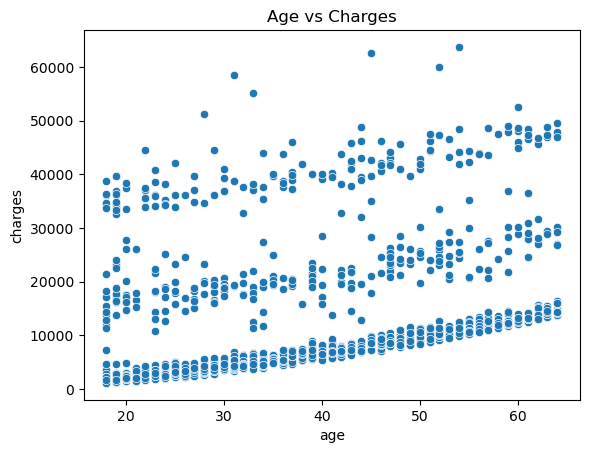

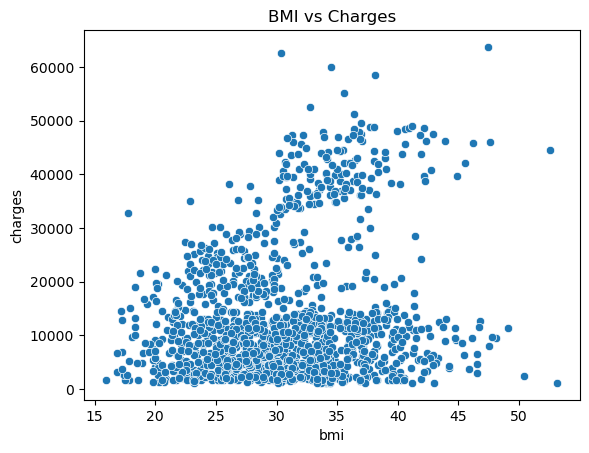

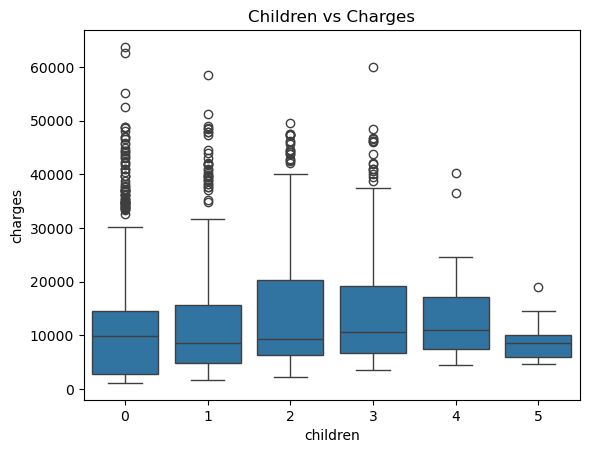

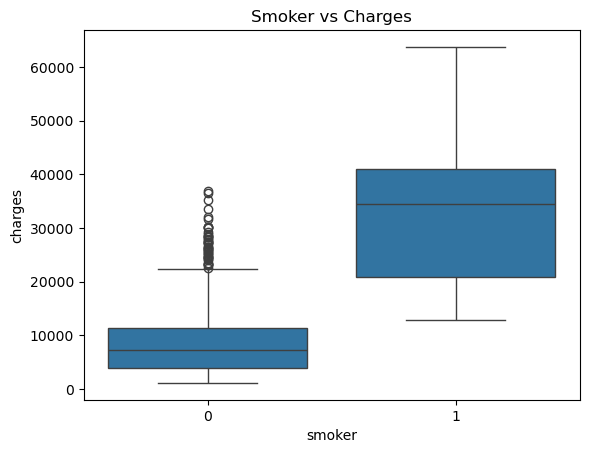

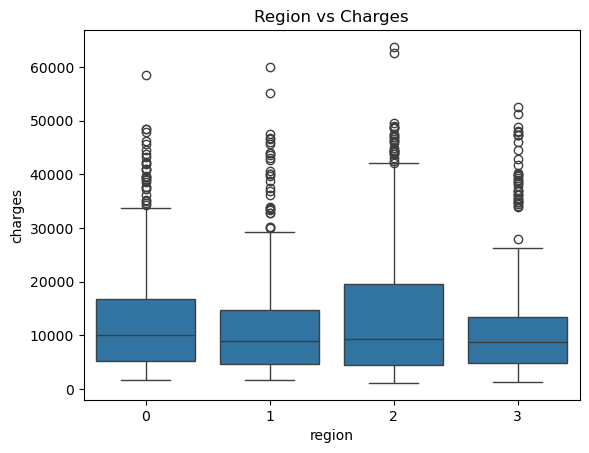

In [227]:
# so, in order to follow my plan above, i first check for missing values (which i already did when evaluating the dataset, so i'm not going to do it again here)
# next up was to analyze the distribution of the target variable and features to see if there are any outliers present
# i will use a scatter plots and box plots to visualize the distribution

# a scatter plot for age vs charges
sns.scatterplot(x='age', y='charges', data=insurance_df)
plt.title('Age vs Charges')
plt.show()

# a scatter plot for bmi vs charges
sns.scatterplot(x='bmi', y='charges', data=insurance_df)
plt.title('BMI vs Charges')
plt.show()

# a box plot for children vs charges
sns.boxplot(x='children', y='charges', data=insurance_df)
plt.title('Children vs Charges')
plt.show()

# a box plot for smoker vs charges
sns.boxplot(x='smoker', y='charges', data=insurance_df)
plt.title('Smoker vs Charges')
plt.show()

# a box plot for region vs charges
sns.boxplot(x='region', y='charges', data=insurance_df)
plt.title('Region vs Charges')
plt.show()

# from these plots, i can identify if there are any outliers present in the dataset


Based on the above graphs, we can now see how each of the variables affect the target variable. Age has a positive correlation with charges, which means that as age increases, charges also increase. BMI is all over the place, with a lot of data points consistently at the lower end, but in the high end, we can see that there is a somewhat positive correlation. Children has a "stepping stone" shape, showing an increase in charges from 0 to 2 kids, and then a decrease in charges from 3 to 5 kids. The smoker box plot clearly shows us that there is a significant difference in charges between smokers and non-smokers, with smokers having higher charges. Finally, the region boxplots show us that there isn't really a significant difference in charges between regions.
### 3b) Feature Selection

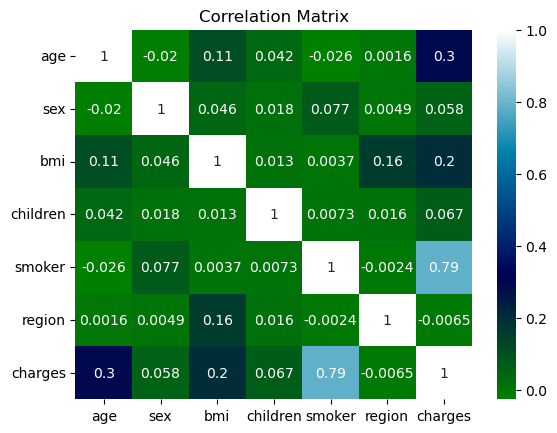

In [228]:
# next, onto feature selection. i will use a correlation matrix to see which features are most correlated with the target variable
sns.heatmap(insurance_df.corr(), annot=True, cmap='ocean')
plt.title('Correlation Matrix')
plt.show()

What immediately jumps out is that 'smoker' and 'charges' have a correlation of 0.79. This means that 'smoker' is highly correlated with 'charges', in a positive way (as one increases, so does the other). We can interpret from that, that 'smoker' is a good predictor for 'charges'.Other features are a lot weaker, with age being a 0.3, sex being between 0 and 0.1, bmi at 0.2, children being between 0 and 0.1, and region being between 0 and -0.1.

This means that out of all features, 'smoker' is the best predictor for 'charges'.

In [229]:
# next up, vif.
# vif is a measure of multicollinearity, which is when more than one independent variable is highly correlated
# by combining the results of the correlation matrix and vif, i can be more sure whether i'm dealing with multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(insurance_df.values, i) for i in range(insurance_df.shape[1])]
vif["Features"] = insurance_df.columns
vif.round(1)

,VIF Factor,Features
0,9.3,age
1,2.0,sex
2,10.5,bmi
3,1.8,children
4,4.0,smoker
5,3.0,region
6,7.9,charges


In [230]:
# judging by the output, i can see that bmi and age are the most correlated features with the target variable
# this doesn't line up with the correlation matrix, which had smoker as the most correlated feature with the target variable

In [ ]:
# i will now do one final check to figure out which features are most important, using a tree regressor
# this will allow me to be sure of which features are most important
from sklearn.tree import ExtraTreeRegressor
x = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']
model = ExtraTreeRegressor(random_state=42)
model.fit(x, y)
model
# (ArcGIS Pro, 2025)

# now, from the model, i will extract feature importances
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances


age         0.138404
sex         0.009187
bmi         0.188511
children    0.023737
smoker      0.620566
region      0.019596
dtype: float64

I am now sure that the smoker feature is the most relevant feature in predicting charges, with age and BMI being the other 2 most relevant factors.

In [ ]:
# in order to train my linear regression model, i will use the sklearn LinearRegression class
# i will also split up my data into training and testing sets (following the 80/20 split rule)
# to go above and beyond, i will use a random state of 42 to ensure that my results are reproducible
# i will also use a test size of 0.2 (ensuring that 80/20 split)
# additionally, i will use gridsearchcv to find the best hyperparameters
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = GridSearchCV(LinearRegression(), param_grid={'fit_intercept': [True, False]}, cv=5, n_jobs=-1, scoring='r2')
model.fit(x_train, y_train)
# (Galhena R, 2019)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]}, scoring='r2')

The model is now trained, and we have data to test the model and evaluate its performance.
## Question 4: Model Evaluation
### 4a) Interpretation and Evaluation


In [233]:
# based on the plan, i will use r squared, mean squared error, root mean squared error, and mean absolute error to evaluate my models performance
# firstly, i import the required packages
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# r squared
r2 = r2_score(y_test, model.predict(x_test))
print(f"R Squared: {r2:.2f}")

# mean squared error
mse = mean_squared_error(y_test, model.predict(x_test))
print(f"Mean Squared Error: {mse:.2f}")

# root mean squared error
rmse = mean_squared_error(y_test, model.predict(x_test), squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")

# mean absolute error
mae = mean_absolute_error(y_test, model.predict(x_test))
print(f"Mean Absolute Error: {mae:.2f}")

R Squared: 0.81
Mean Squared Error: 35493102.61
Root Mean Squared Error: 5957.61
Mean Absolute Error: 4182.35


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


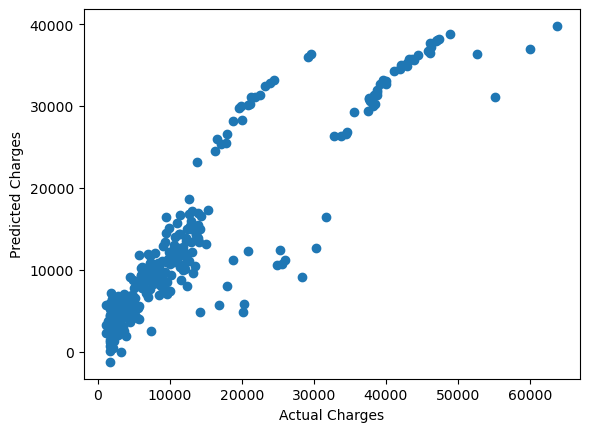

In [234]:
# to visualize the performance of the model, we can use a scatterplot to compare the predicted values to the actual values
plt.scatter(y_test, model.predict(x_test))
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

# Question 5: Report

## 1. Data Cleaning
The dataset was initially loaded into a pandas DataFrame for analysis. The following steps were undertaken to ensure the data was clean and ready for modeling:

1. **Missing Values**: A check for missing values was conducted using `isnull().sum()`. No missing values were found, ensuring data completeness.
2. **Duplicate Records**: Duplicate rows were identified and removed using `drop_duplicates()`. This step ensured that the dataset was free from redundant information that could bias the model.
3. **Categorical Encoding**: Categorical variables (`sex`, `smoker`, `region`) were converted into numerical representations using `LabelEncoder`. This transformation allowed the model to process these variables mathematically:
    - `sex`: Encoded as 0 (female) and 1 (male).
    - `smoker`: Encoded as 0 (non-smoker) and 1 (smoker).
    - `region`: Encoded as 0 (Southwest), 1 (Southeast), 2 (Northwest), and 3 (Northeast).

## 2. Exploratory Data Analysis (EDA)
EDA was performed to uncover patterns and relationships within the data, particularly focusing on the target variable, `charges`.

### 2.1 Visualizations
1. **Scatter Plots**:
    - **Age vs Charges**: A positive correlation was observed, indicating that older individuals tend to incur higher insurance charges.
    - **BMI vs Charges**: Higher BMI values were associated with increased charges, though the relationship was less pronounced compared to other variables.
2. **Box Plots**:
    - **Smoker vs Charges**: Smokers exhibited significantly higher charges compared to non-smokers, highlighting the financial impact of smoking on healthcare costs.
    - **Region vs Charges**: No substantial differences in charges were observed across regions, suggesting that geographic location has minimal influence on costs.
 
  (w3resource, 2022)

### 2.2 Correlation Analysis
A correlation matrix revealed that the `smoker` variable had the strongest positive correlation (0.79) with `charges`. This indicates that smoking status is a critical predictor of insurance costs. Other variables, such as `age` (0.30) and `BMI` (0.20), showed weaker correlations.

### 2.3 Multicollinearity Check
Variance Inflation Factor (VIF) was calculated to assess multicollinearity among predictors. The results indicated no severe multicollinearity, ensuring that the predictors are independently contributing to the model.

### 2.4 Feature Importance
Using a tree-based regressor (`ExtraTreeRegressor`), feature importances were calculated. The `smoker` variable emerged as the most influential predictor, followed by `age` and `BMI`. This aligns with domain knowledge, as smoking, age, and BMI are known to significantly impact healthcare costs (ArcGIS Pro, 2025).

## 3. Model Training
A linear regression model was chosen due to its simplicity and interpretability, making it suitable for healthcare applications. The following steps were taken:

1. **Data Splitting**: The dataset was split into training (80%) and testing (20%) sets to evaluate model performance on unseen data.
2. **Hyperparameter Optimization**: `GridSearchCV` was used to optimize the `fit_intercept` parameter, ensuring the best model configuration. (Galhena R, 2019)
3. **Training**: The model was trained on the training set using cross-validation to enhance generalizability.

## 4. Model Evaluation
The model's performance was assessed using multiple metrics to ensure reliability and accuracy:

1. **R-Squared**: The model achieved an R-squared value of 0.81, indicating that 81% of the variance in insurance charges is explained by the predictors.
2. **Mean Squared Error (MSE)**: The MSE was calculated as 35,493,102.61, representing the average squared difference between predicted and actual charges.
3. **Root Mean Squared Error (RMSE)**: The RMSE was 5,957.61, providing an interpretable measure of prediction error in the same units as the target variable.
4. **Mean Absolute Error (MAE)**: The MAE was 4,182.35, indicating the average absolute difference between predicted and actual charges.

### Visualization of Predictions
A scatter plot comparing predicted charges to actual charges demonstrated strong alignment, reinforcing the model's accuracy. Most predictions closely matched the actual values, with minimal deviation.

## 5. Interpretation and Insights
- **Key Predictors**: Smoking status was identified as the most significant driver of insurance charges, followed by age and BMI. This aligns with healthcare trends, where smoking and obesity are major contributors to increased medical costs.
- **Model Performance**: The high R-squared value and low error metrics suggest that the model is effective in predicting insurance charges. This provides confidence in its use for decision-making.
- **Business Implications**: Insights from the model can inform pricing strategies, such as higher premiums for smokers, and support wellness programs targeting smoking cessation and weight management.

## 6. Conclusion
The dataset was successfully cleaned, analyzed, and modeled to predict insurance charges. The linear regression model demonstrated strong performance, making it a valuable tool for healthcare providers and insurers. By leveraging these insights, stakeholders can better manage risks, optimize pricing, and promote healthier lifestyles among clients.

# References

ArcGIS Pro, 2025. *How Extra trees classification and regression algorithm works.* [online] Available at:
<<https://pro.arcgis.com/en/pro-app/latest/tool-reference/geoai/how-extra-tree-classification-and-regression-works.htm>> [Accessed 25 April 2025].

Galhena, R., 2019. *Select best parameters for regression model using GridSearch.* [online] Available at:
<<https://stackoverflow.com/questions/59489830/select-best-parameters-for-regression-model-using-gridsearch>> [Accessed 25 April 2025].

w3resource, 2022. *Python Scikit-learn: Create a box plot which shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable of iris dataset.* [online] Available at:
<<https://www.w3resource.com/machine-learning/scikit-learn/iris/python-machine-learning-scikit-learn-iris-visualization-exercise-18.php>> [Accessed 25 April 2025].